In [1]:
import numpy as np
import torch  # 基础库
from torch.utils.data import TensorDataset, DataLoader  # 数据加载
from torch import nn  # 网络模型
from torch.nn import init  # 参数初始化
import torch.optim as optim  # 优化算法
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

from PIL import Image
import cv2

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'  # plt绘图报错（不显示图的问题）
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

"\nr, g, b = img.split()  # 分离三通道\n# pic = Image.merge('RGB', (r, g, b))  # 合并三通道\n"

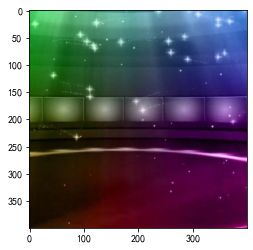

In [2]:
# 读入一张图片，并转换为灰度图
#im = Image.open('./cat.jpg').convert('L')
img_lena = Image.open('../../../imagelib/img/bg.jpg')
# PIL读取的图像为PIL.Image.Image对象，无法用matplotlib直接显示,需要先转为numpy.ndarray对象。
img_lena_1 = np.array(img_lena)
plt.figure()
plt.imshow(img_lena_1)
img_lena_1.shape

"""
r, g, b = img.split()  # 分离三通道
# pic = Image.merge('RGB', (r, g, b))  # 合并三通道
"""


# def show_img(images, labels):
#     # 这里的_表示我们忽略（不使用）的变量
#     _, figs = plt.subplots(1, len(images), figsize=(12, 12))
#     for f, img, lbl in zip(figs, images, labels):
#         f.imshow(img.view((84, 84)).numpy()) # img.view((84, 84)).numpy()
#         f.set_title(lbl)
#         f.axes.get_xaxis().set_visible(False)
#         f.axes.get_yaxis().set_visible(False)
#     plt.show()

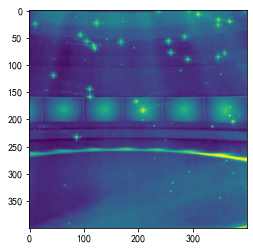

In [3]:
# 读入一张图片，并转换为灰度图
#im = Image.open('./cat.jpg').convert('L')
r, g, b = img_lena.split()  # 分离三通道

plt.figure()
plt.imshow(np.array(r))

In [4]:

"""
 # 三个不同的卷积核
# kernel_1和kernel2均为边缘检测,kernel_3为均值模糊
kernel_1 = [[-1, -1, -1],
          [-1,  8, -1],
          [-1, -1, -1]]

kernel_2 = [[ 0, -1,  0],
          [-1,  4, -1],
          [ 0, -1,  0]]

kernel_3 = [[ 1/9,  1/9,  1/9],
          [ 1/9,  1/9,  1/9],
          [ 1/9,  1/9,  1/9]]
"""
kernel_1 = [[-1, -1, -1],
                  [-1,  8, -1],
                  [-1, -1, -1]]
kernel = torch.Tensor(kernel_1).unsqueeze(0).unsqueeze(0)
kernel.size()

torch.Size([1, 1, 3, 3])

torch.Size([1, 1, 400, 400])
torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 398, 398])


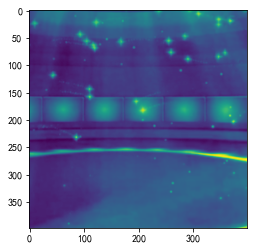

In [5]:
transform1 = transforms.ToTensor()
r_tensor = transform1(np.array(r))
r_tensor = r_tensor.view(1, 1, 400, 400)
print(r_tensor.size())


# 均值滤波（卷积核）
r_m = 1.0 / 9.0
r_mean_filter = torch.tensor([[r_m, r_m, r_m], [r_m, r_m, r_m], [r_m, r_m, r_m]])
r_mean_filter = r_mean_filter.view(1, 1, 3, 3)
print(r_mean_filter.size())

r_out = nn.functional.conv2d(r_tensor, r_mean_filter, stride=1, padding=0)
print(r_out.size())

plt.figure()
plt.imshow(r_out.view((398, 398)).numpy())

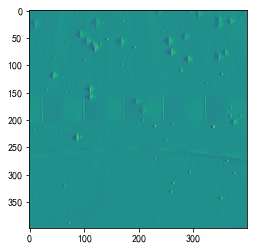

In [6]:
# 垂直特征
r_vertical_filter = torch.tensor([[1.0, 0.0, -1.0], [1.0, 0.0, -1.0], [1.0, 0.0, -1.0]]).view(1, 1, 3, 3)
r_out_v = nn.functional.conv2d(r_tensor, r_vertical_filter, stride=1, padding=0)
plt.figure()
plt.imshow(r_out_v.view((398, 398)).numpy())

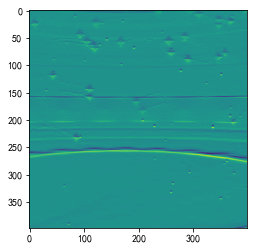

In [7]:
# 水平特征
r_horizontal_filter = torch.tensor([[1.0, 1.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -1.0, -1.0]]).view(1, 1, 3, 3)
r_out_h = nn.functional.conv2d(r_tensor, r_horizontal_filter, stride=1, padding=0)
plt.figure()
plt.imshow(r_out_h.view((398, 398)).numpy())

In [8]:
# 多通道
"""
torch.nn.functional.conv2d(input,filters,bias,stride,padding,dilation,groups)
input代表输入图像的大小(minibatch，in_channels，H，W)，是一个四维tensor
filters代表卷积核的大小(out_channels，in_channe除以/groups，H，W)，是一个四维tensor
"""
# # 均值滤波（卷积核）
#
# img_tensor = transform1(img_lena_1) #torch.randn((1,1,300,300))
# img_tensor = img_tensor.view(1,3,400,400)
# print(img_tensor.size())
#
# # new_img_PIL = transforms.ToPILImage()(img_tensor.view(3,400,400))
# # new_img_PIL.show() # 处理后的PIL图片
#
# m = 1.0/9.0
# mean_filter = torch.tensor([[m,m,m],[m,m,m],[m,m,m]])
# mean_filter = mean_filter.view(1,1,3,3)#.repeat(3,3, 1, 1)
# print(mean_filter.size())
# print(mean_filter)
# # print(mean_filter.repeat(3, 1, 1).size())
# o = nn.functional.conv2d(img_tensor, mean_filter,stride=1,padding=0)
# print(o.size())
#
# plt.figure()
# plt.imshow(o.view((398, 398)).numpy())

'\ntorch.nn.functional.conv2d(input,filters,bias,stride,padding,dilation,groups)\ninput代表输入图像的大小(minibatch，in_channels，H，W)，是一个四维tensor\nfilters代表卷积核的大小(out_channels，in_channe除以/groups，H，W)，是一个四维tensor\n'

In [9]:
# Sobel 滤波,检测边缘
def get_sobel_kernel(kernel_size=3):
    # get range
    range = torch.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    # compute a grid the numerator and the axis-distances
    y, x = torch.meshgrid(range, range)
    #Note: x is edge detector in x, y is edge detector in y, if not dividing by den
    den = (x ** 2 + y ** 2)
    #den[:, kernel_size // 2] = 1  # avoid division by zero at the center of den
    den[kernel_size // 2, kernel_size // 2] = 1  # avoid division by zero at the center of den
    #sobel_2D = x / den #produces kernel in range (0,1)
    sobel_2D = 2 * x / den  #produces same kernel as kornia
    return sobel_2D

get_sobel_kernel()

tensor([[-1.,  0.,  1.],
        [-2.,  0.,  2.],
        [-1.,  0.,  1.]])

In [10]:
# 高斯滤波器,模糊滤波器来消除输入图像中的噪声。kernel越大，输出的图像越容易模糊。
def get_gaussian_kernel(k=3, mu=0, sigma=1, normalize=True):
    # compute 1 dimension gaussian
    gaussian_1D = np.linspace(-1, 1, k)
    # compute a grid distance from center
    x, y = np.meshgrid(gaussian_1D, gaussian_1D)
    distance = (x ** 2 + y ** 2) ** 0.5

    # compute the 2 dimension gaussian
    gaussian_2D = np.exp(-(distance - mu) ** 2 / (2 * sigma ** 2))
    gaussian_2D = gaussian_2D / (2 * np.pi * sigma ** 2)

    # normalize part (mathematically)
    if normalize:
        gaussian_2D = gaussian_2D / np.sum(gaussian_2D)
    return gaussian_2D

get_gaussian_kernel()

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [11]:
def get_thin_kernels(start=0, end=360, step=45):
    k_thin = 3  # actual size of the directional kernel
    # increase for a while to avoid interpolation when rotating
    k_increased = k_thin + 2

    # get 0° angle directional kernel
    thin_kernel_0 = np.zeros((k_increased, k_increased))
    thin_kernel_0[k_increased // 2, k_increased // 2] = 1
    thin_kernel_0[k_increased // 2, k_increased // 2 + 1:] = -1

    # rotate the 0° angle directional kernel to get the other ones
    thin_kernels = []
    for angle in range(start, end, step):
        (h, w) = thin_kernel_0.shape
        # get the center to not rotate around the (0, 0) coord point
        center = (w // 2, h // 2)
        # apply rotation
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
        kernel_angle_increased = cv2.warpAffine(thin_kernel_0, rotation_matrix, (w, h), cv2.INTER_NEAREST)

        # get the k=3 kerne
        kernel_angle = kernel_angle_increased[1:-1, 1:-1]
        is_diag = (abs(kernel_angle) == 1)  # because of the interpolation
        kernel_angle = kernel_angle * is_diag  # because of the interpolation
        thin_kernels.append(kernel_angle)
    return thin_kernels

get_thin_kernels()

[array([[ 0.,  0.,  0.],
        [ 0.,  1., -1.],
        [ 0.,  0.,  0.]]),
 array([[ 0., -0., -1.],
        [ 0.,  1., -0.],
        [ 0.,  0.,  0.]]),
 array([[ 0., -1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  0.]]),
 array([[-1., -0.,  0.],
        [-0.,  1.,  0.],
        [ 0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.],
        [-1.,  1.,  0.],
        [ 0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.],
        [-0.,  1.,  0.],
        [-1., -0.,  0.]]),
 array([[ 0.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0., -1.,  0.]]),
 array([[ 0.,  0.,  0.],
        [ 0.,  1., -0.],
        [ 0., -0., -1.]])]

In [12]:
import numbers
def get_box_kernel(kernel_size: int = 5, dim=2):
    if isinstance(kernel_size, numbers.Number):
        kernel_size = [kernel_size] * dim

    kx = kernel_size[0]
    ky = kernel_size[1]
    box_kernel = torch.Tensor(np.ones((kx, ky)) / (float(kx)*float(ky)))

    return box_kernel

get_box_kernel()

tensor([[0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
        [0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
        [0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
        [0.0400, 0.0400, 0.0400, 0.0400, 0.0400],
        [0.0400, 0.0400, 0.0400, 0.0400, 0.0400]])

In [13]:
import math
#dim is the image dimension (2D=2, 3D=3, etc), but for now the final_kernel is hardcoded to 2D images
#Not sure if it would make sense in higher dimensions
#Note: Kornia suggests their laplacian kernel can also be used to generate LoG kernel:
# https://torchgeometry.readthedocs.io/en/latest/_modules/kornia/filters/laplacian.html
def get_log_kernel(kernel_size=5, sigma=None, dim=2): #sigma=0.6; kernel_size=5

    #either kernel_size or sigma are required:
    if not kernel_size and sigma:
        kernel_size = np.ceil(sigma*6)
        kernel_size = [kernel_size] * dim #note: should it be [kernel_size] or [kernel_size-1]? look below
    elif kernel_size and not sigma:
        sigma = kernel_size/6.0
        sigma = [sigma] * dim

    if isinstance(kernel_size, numbers.Number):
        kernel_size = [kernel_size-1] * dim
    if isinstance(sigma, numbers.Number):
        sigma = [sigma] * dim

    grids = torch.meshgrid([torch.arange(-size//2,size//2+1,1) for size in kernel_size])

    kernel = 1
    for size, std, mgrid in zip(kernel_size, sigma, grids):
        kernel *= torch.exp(-(mgrid**2/(2.*std**2)))

    #TODO: For now hardcoded to 2 dimensions, test to make it work in any dimension
    final_kernel = (kernel) * ((grids[0]**2 + grids[1]**2) - (2*sigma[0]*sigma[1])) * (1/((2*math.pi)*(sigma[0]**2)*(sigma[1]**2)))

    #TODO: Test if normalization has to be negative (the inverted peak should not make a difference)
    final_kernel = -final_kernel / torch.sum(final_kernel)

    return final_kernel

get_log_kernel()

tensor([[  0.1930,   0.9142,   1.3581,   0.9142,   0.1930],
        [  0.9142,   1.3416,  -1.7539,   1.3416,   0.9142],
        [  1.3581,  -1.7539, -12.8691,  -1.7539,   1.3581],
        [  0.9142,   1.3416,  -1.7539,   1.3416,   0.9142],
        [  0.1930,   0.9142,   1.3581,   0.9142,   0.1930]])

torch.Size([1, 1, 396, 396])


<ipython-input-14-639cced4b2e4>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(get_log_kernel()).view(1, 1, 5, 5),


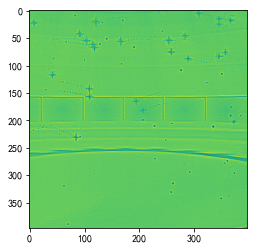

In [14]:
demo_o = nn.functional.conv2d(r_tensor,
                               torch.tensor(get_log_kernel()).view(1, 1, 5, 5),
                               stride=1,
                               padding=0)
print(demo_o.size())
plt.figure()
plt.imshow(demo_o.view((396, 396)).numpy())

torch.Size([3, 400, 400])
torch.Size([1, 3, 400, 400])
torch.Size([1, 1, 400, 400]) torch.Size([1, 1, 400, 400])


c:\program files\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


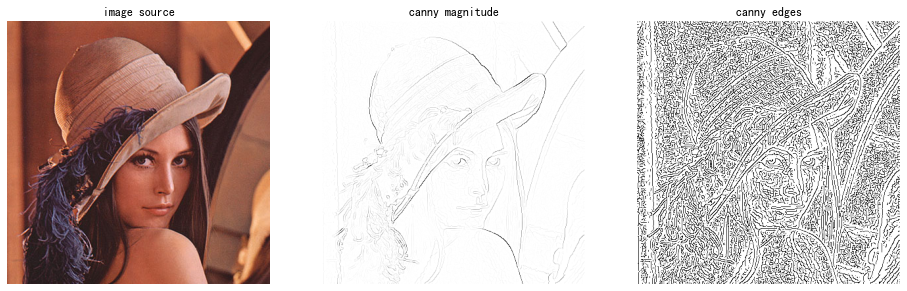

In [37]:
# 其它过滤器
# https://github.com/victorca25/BasicSR/blob/master/codes/dataops/filters.py
# https://kornia.readthedocs.io/en/latest/filters.html
# 扩展维度 unsqueeze
import kornia
from kornia import filters
x_rgb = torchvision.io.read_image('../../../imagelib/img/lena.jpg')
x_rgb = x_rgb.float() # tensor.type(torch.FloatTensor)
print(x_rgb.size())
x_rgb = x_rgb.unsqueeze(0)
print(x_rgb.size())
magnitude, edges = filters.canny(x_rgb,low_threshold=0.1, high_threshold=0.2)
print(magnitude.size(),edges.size())

fig, axs = plt.subplots(1, 3, figsize=(16,16))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(kornia.tensor_to_image(x_rgb.byte()))

axs[1].axis('off')
axs[1].set_title('canny magnitude')
axs[1].imshow(magnitude.view((400, 400)).numpy(), cmap='Greys')#

axs[2].axis('off')
axs[2].set_title('canny edges')
axs[2].imshow(kornia.tensor_to_image(edges.byte()), cmap='Greys')#, cmap='Greys'